In [1]:
# Importing libraries
import nltk
nltk.download('popular')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from string import punctuation

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [2]:
# Defining constants used in the code
SAMPLE_PERCENTAGE = 0.10
FIRST_N_RECORDS = 10

**Reading data and removing unnecessary cloumns and data**




In [4]:
file_path = 'https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=['label','tweet'])

# To Remove top row from a dataframe
df = df[1:] 

# To show the full column
pd.set_option('display.max_colwidth', None) 

print(df.shape)
df.head(FIRST_N_RECORDS)

(31962, 2)


,label,tweet
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urÃ°ÂÂÂ±!!! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ Ã°ÂÂÂ¦Ã°ÂÂÂ¦Ã°ÂÂÂ¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢ÂÂ¦
8,0,the next school year is the year for exams.Ã°ÂÂÂ¯ can't think about that Ã°ÂÂÂ­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers Ã¢ÂÂ¦
10,0,@user @user welcome here ! i'm it's so #gr8 !


**To get some percentage of the data as sample for modelling in terms of reducing the computation burden**

In [5]:
sample_size = int(np.array(df.shape[0])*SAMPLE_PERCENTAGE)
df = df.sample(sample_size, replace=False)
print(f"Sample size is {sample_size}")
print(f"Sample data dimension is {df.shape}")


Sample size is 3196
Sample data dimension is (3196, 2)


In [6]:
df.head(FIRST_N_RECORDS)

,label,tweet
30563,0,i cannot wait to go see finding dory! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ #findingdory #cantwait
4513,1,video men and womenmalayalam girl with dreads porn video
13946,0,@user well here i am...just waiting...all alone... #lonely #writing #amwriting #scifi #novel #author
4188,0,passenger hits brooklyn bus driver with bottle after argument #jobs #jobsearch #news: #an irate passen...
11391,0,@user and now we've got @user #fangirling @user
21857,0,@user @user i saw the rubik's cube in my prof's office and fell in love bc i love matlab so much. and i lost it in a library :(
1435,0,i am thankful for vacation days. #thankful #positive
13726,0,"@user agreed, if you study the history of the united states, we always put others down that are different than the status quo"
22576,0,@user 3 more sleeps until @user Ã°ÂÂÂ´Ã°ÂÂÂ´Ã°ÂÂÂ´ #hurryup @user @user @user @user #conquercancer
1239,0,stay tuned! saint issue #4 is at the printers! #comics #makecomics


**Removing the Twitter Handles and Hashtags**




In [7]:
def remove_pattern(input_txt, pattern):
  '''
  This removes the twitter handles from the pandas dataframe
  https://stackoverflow.com/questions/50830214/remove-usernames-from-twitter-data-using-python 

  '''
  r = re.findall(pattern, input_txt)
  for i in r:
      input_txt = re.sub(i, '', input_txt)
  return input_txt    

In [8]:
# To remove the twitter handles
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") 
df.head(FIRST_N_RECORDS)

,label,tweet
30563,0,i cannot wait to go see finding dory! Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ #findingdory #cantwait
4513,1,video men and womenmalayalam girl with dreads porn video
13946,0,well here i am...just waiting...all alone... #lonely #writing #amwriting #scifi #novel #author
4188,0,passenger hits brooklyn bus driver with bottle after argument #jobs #jobsearch #news: #an irate passen...
11391,0,and now we've got #fangirling
21857,0,i saw the rubik's cube in my prof's office and fell in love bc i love matlab so much. and i lost it in a library :(
1435,0,i am thankful for vacation days. #thankful #positive
13726,0,"agreed, if you study the history of the united states, we always put others down that are different than the status quo"
22576,0,3 more sleeps until Ã°ÂÂÂ´Ã°ÂÂÂ´Ã°ÂÂÂ´ #hurryup #conquercancer
1239,0,stay tuned! saint issue #4 is at the printers! #comics #makecomics


**Creating the set of stopwords and punctuation**

In [9]:
stop_words = set(stopwords.words('english')+list(punctuation))
print(f'Number of stopwords : {len(stop_words)}')
print(stop_words)

Number of stopwords : 211
{'herself', 'again', 'those', 'himself', "it's", 'd', 've', '\\', 'these', 't', 'does', 'through', '<', 'further', 'at', "wouldn't", 'few', 'against', 'wouldn', 'haven', 'don', 'both', '!', '$', 'am', 'has', 'do', 'while', ',', 'about', 'into', 'which', 'doesn', "haven't", '=', '@', '.', '/', 'as', 'so', 'couldn', 'whom', 'wasn', '+', 'more', "shan't", 'been', 'you', "you've", 'nor', 'very', 'will', '~', 'a', '>', 'myself', "she's", 'here', 'me', 'up', 'when', 'now', 'below', 'have', 'not', 'each', 'during', '#', 'until', "hadn't", 'too', 'mustn', "shouldn't", 'be', '?', 'who', 'had', '[', "hasn't", 'm', ']', "wasn't", "mightn't", 'shan', 'for', 'did', 's', "aren't", "won't", '*', 'i', 'out', 'y', 'over', 'are', ')', "isn't", 'it', 'is', 'there', 'if', 'needn', 'yours', 'other', 'theirs', 'than', 'ma', 'after', 'off', 'an', 'should', 'in', 'can', 'shouldn', 'before', 'them', 'itself', '%', 'by', 'having', 'being', 'hers', 'such', '&', "didn't", 'what', 'all', 

In [10]:
# Cretaing the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer() 
stemmer = PorterStemmer() 

In [11]:
def clean_tweet_data(text):
  ''' 
     input : tweet data as pandas.series 

     returns: list of sentences which meet these requirements : lemmatized, lowercase, alpha and non-stopwords
  '''
  cleaned_tweet_list = []
  for sentence in  text.to_list():
    words = [lemmatizer.lemmatize(word) for word in word_tokenize(sentence.lower()) if ((word.isalpha()== True) & (word not in stop_words))]
    newsentence = (" ".join(words)).strip()
    cleaned_tweet_list.append(newsentence)

  return cleaned_tweet_list



In [12]:
cleaned_sentences = clean_tweet_data(df.tweet)
cleaned_sentences[:FIRST_N_RECORDS]


['wait go see finding dory findingdory cantwait',
 'video men womenmalayalam girl dread porn video',
 'well waiting alone lonely writing amwriting scifi novel author',
 'passenger hit brooklyn bus driver bottle argument job jobsearch news irate passen',
 'got fangirling',
 'saw rubik cube prof office fell love bc love matlab much lost library',
 'thankful vacation day thankful positive',
 'agreed study history united state always put others different status quo',
 'sleep hurryup conquercancer',
 'stay tuned saint issue printer comic makecomics']

In [13]:
# Regenarate the df
df = pd.DataFrame(zip(df.label.to_list(), cleaned_sentences), columns=['label','tweet'])
df.head(FIRST_N_RECORDS)

,label,tweet
0,0,wait go see finding dory findingdory cantwait
1,1,video men womenmalayalam girl dread porn video
2,0,well waiting alone lonely writing amwriting scifi novel author
3,0,passenger hit brooklyn bus driver bottle argument job jobsearch news irate passen
4,0,got fangirling
5,0,saw rubik cube prof office fell love bc love matlab much lost library
6,0,thankful vacation day thankful positive
7,0,agreed study history united state always put others different status quo
8,0,sleep hurryup conquercancer
9,0,stay tuned saint issue printer comic makecomics


In [14]:
df.shape

(3196, 2)

In [15]:
# Removing duplicate records
def drop_duplicate_records(df):
  num_of_duplicate_records = len(df)-len(df.drop_duplicates(inplace=False))
  df.drop_duplicates(inplace=True)
  print(f"{num_of_duplicate_records} duplicate records are dropped.\nThe number of unique records is {df.shape[0]}")

In [16]:
drop_duplicate_records(df)

165 duplicate records are dropped.
The number of unique records is 3031


In [17]:
# To explore the data
df.describe()

,label,tweet
count,3031,3031
unique,2,3030
top,0,
freq,2802,2


In [18]:
# To check the missing/null values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [19]:

df.label.value_counts()

0    2802
1     229
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


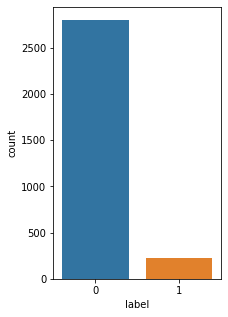

In [20]:
import seaborn as sns
fig= plt.figure(figsize=(3,5))


sns.countplot(x='label', data = df);

In [21]:
# Determining the most common words in all words
words = word_tokenize(" ".join(df.tweet.to_list()))

from nltk.probability import FreqDist
freq_dist= FreqDist(words)
freq_dist.most_common(10)

[('day', 270),
 ('love', 259),
 ('amp', 195),
 ('happy', 148),
 ('life', 113),
 ('today', 108),
 ('new', 108),
 ('like', 104),
 ('u', 102),
 ('get', 96)]

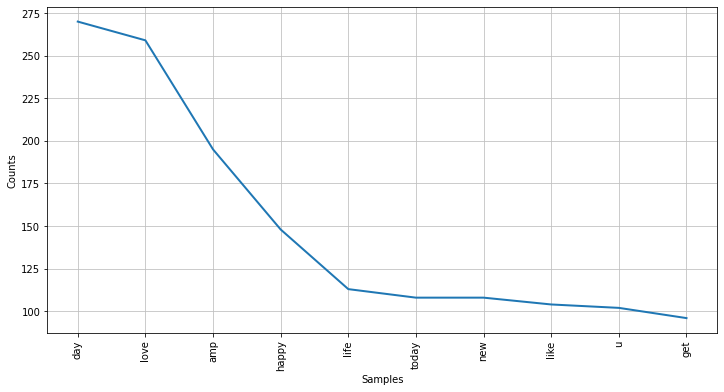

In [22]:
fig= plt.figure(figsize=(12,6))
freq_dist.plot(10)

In [23]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(df.tweet.to_list())

In [24]:
vocab_length = len(word_tokenizer.word_index)+1
print(f'vocab_length : {vocab_length}')

vocab_length : 7552


In [25]:
embedded_sentences = word_tokenizer.texts_to_sequences(df.tweet.to_list())
embedded_sentences[:FIRST_N_RECORDS]

[[40, 20, 16, 442, 1125, 866, 867],
 [79, 252, 2508, 29, 2509, 354, 79],
 [103, 508, 308, 868, 713, 869, 1554, 1555, 870],
 [1556, 610, 1557, 1558, 2510, 714, 2511, 188, 1559, 212, 2512, 2513],
 [28, 2514],
 [393, 2515, 2516, 1560, 871, 1561, 2, 715, 2, 2517, 145, 146, 1126],
 [17, 509, 1, 17, 24],
 [1127, 2518, 226, 510, 511, 156, 394, 395, 396, 1128, 2519],
 [213, 1562, 2520],
 [397, 1563, 2521, 443, 1564, 1565, 2522]]

In [26]:
len(embedded_sentences), len(df.tweet.to_list())

(3031, 3031)

In [27]:
# Padding the sequences

word_count =  lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(df.tweet.to_list(),key=word_count)
length_longest_sentence = len(word_tokenize(longest_sentence))
print(f'Longest sentence: "{longest_sentence}", with {length_longest_sentence}  words ' )
padded_sentences = pad_sequences(embedded_sentences, length_longest_sentence,padding='post')
print(padded_sentences[:FIRST_N_RECORDS])

Longest sentence: "judge let rapist johnrkhoward wlk aftr rape special need blk teen ddnt wnt tht record wud nevr work n reverse", with 20  words 
[[  40   20   16  442 1125  866  867    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  79  252 2508   29 2509  354   79    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 103  508  308  868  713  869 1554 1555  870    0    0    0    0    0
     0    0    0    0    0    0]
 [1556  610 1557 1558 2510  714 2511  188 1559  212 2512 2513    0    0
     0    0    0    0    0    0]
 [  28 2514    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 393 2515 2516 1560  871 1561    2  715    2 2517  145  146 1126    0
     0    0    0    0    0    0]
 [  17  509    1   17   24    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [1127 2518  226  510  511  156  394  395  396 1128 2519    0    0    0
     0    0    0    0    0    0]
 [ 213 1562 2

In [28]:
dimension_for_each_word = 32

In [57]:
model = Sequential()
model.add(Embedding(vocab_length, dimension_for_each_word, input_length=length_longest_sentence))
# model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 32)            241664    
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 32)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 20, 32)            1056      
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 641       
Total params: 243,361
Trainable params: 243,361
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Converting the target values into integer
sentiments = np.array(df.label.astype('int32').to_list())
sentiments

array([0, 1, 0, ..., 0, 0, 0])

In [60]:
X_train, X_test, y_train, y_test = train_test_split( padded_sentences, sentiments, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2424, 20), (2424,), (607, 20), (607,))

In [61]:
model.fit(X_train, y_train, epochs=20, verbose =1, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6587 - acc: 0.8523 - val_loss: 0.6107 - val_acc: 0.9226
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.5549 - acc: 0.9249 - val_loss: 0.4888 - val_acc: 0.9226
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.4128 - acc: 0.9249 - val_loss: 0.3474 - val_acc: 0.9226
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2902 - acc: 0.9249 - val_loss: 0.2701 - val_acc: 0.9226
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2487 - acc: 0.9249 - val_loss: 0.2670 - val_acc: 0.9226
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2453 - acc: 0.9249 - val_loss: 0.2631 - val_acc: 0.9226
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.2348 - acc: 0.9249 - val_loss: 0.2578 - val_acc: 0.9226
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 0.2262 - a

In [62]:
[train_loss, train_acc] = model.evaluate(X_train, y_train, verbose=0)
print("Evaluation result on Training Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))

[test_loss, test_acc] = model.evaluate(X_test, y_test, verbose=0)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Training Data : Loss = 0.05196419730782509, accuracy = 0.9900990128517151
Evaluation result on Test Data : Loss = 0.18857063353061676, accuracy = 0.9275123476982117


In [63]:
# Confusion matrix and calssification report

actual = y_test
predicted = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print(f'\n\nOutcome values : \n True Positive  : {tp} \n False Negative : {fn} \n False Positive : {fp} \n True Negative  : {tn}')

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('\n\nClassification report : \n',matrix)

Confusion matrix : 
 [[560   0]
 [ 44   3]]


Outcome values : 
 True Positive  : 3 
 False Negative : 44 
 False Positive : 0 
 True Negative  : 560


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.06      0.12        47
           0       0.93      1.00      0.96       560

    accuracy                           0.93       607
   macro avg       0.96      0.53      0.54       607
weighted avg       0.93      0.93      0.90       607



## Prediction

In [64]:
# Tweet for the prediction

text = [['A lot of good things are happening. We are respected again throughout the world, and thats a great '
         'thing. @realDonaldTrump']]

#  Preprocessing the tweet

#  Coverting the tweet to Pandas dataframe and cleaning the tweet (ie: lemmatized, lowercase, alpha and non-stopwords)
dframe = pd.DataFrame(text, index=range(0,1,1), columns = ['text'])
cleaned_text = clean_tweet_data(dframe.text)

dframe = pd.DataFrame(cleaned_text, columns=['text'])

#Regenerating the dataframe for the next steps
print(f'Cleaned text :\n {dframe.text}')


Cleaned text :
 0    lot good thing happening respected throughout world thats great thing realdonaldtrump
Name: text, dtype: object


In [67]:
# Vectorizing and padding
word_tokenizer.fit_on_texts(dframe.text)
X = word_tokenizer.texts_to_sequences(dframe.text)
X = pad_sequences(X, maxlen=length_longest_sentence)
print(f'Vectorized and paddedd sentence: \n{X} ')

Vectorized and paddedd sentence: 
[[   0    0    0    0    0    0    0    0    0  170   19   38  505 1551
  2509   66  635   47   38 2510]] 


In [71]:
pred_class = model.predict_classes(X)
print("Predicted value  :" +str(pred_class))


Predicted value  :[[0]]
